<a href="https://colab.research.google.com/github/benson773/churn-ann/blob/main/RANDOM_FOREST_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📂 Please upload your dataset file (Churn_Modelling.csv)


Saving Churn_Modelling (1).csv to Churn_Modelling (1).csv

✅ Dataset successfully loaded!
Shape of dataset: (10000, 14)

First five rows:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



Missing values in dataset:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

✅ Data splitting complete.
Training set: (8000, 11)
Test set: (2000, 11)

🚀 Training the Random Forest model...
✅ Model training complete!

📊 Model Evaluation Results:
Accuracy: 86.85 %

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.47      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.87      0.86      2000



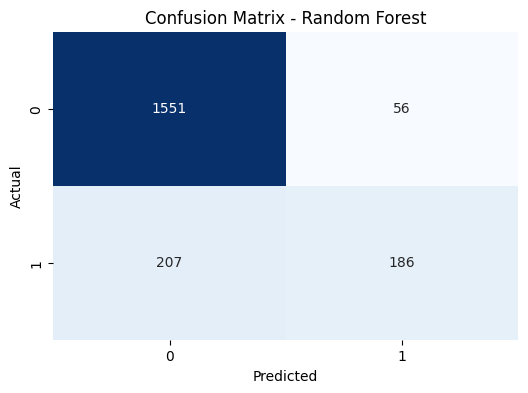

/tmp/ipython-input-1704215717.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


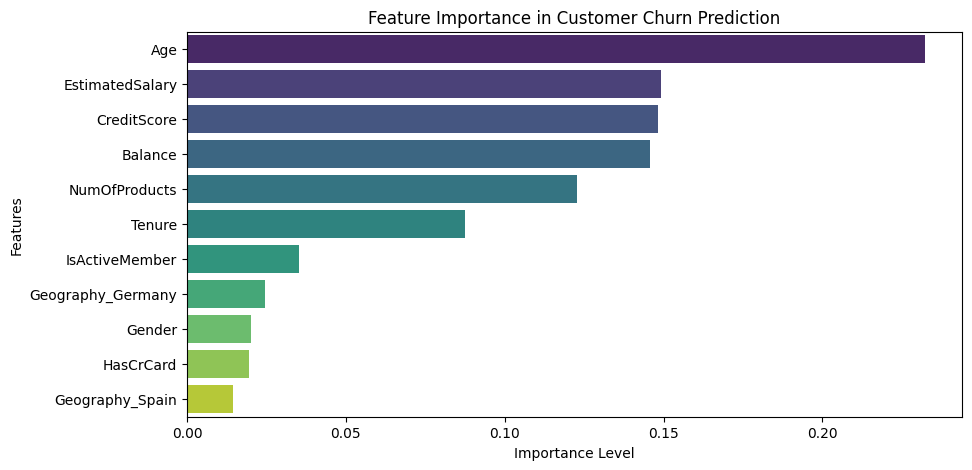


🧠 Summary & Interpretation:
- The Random Forest Classifier achieved an accuracy of 86.85%.
- The confusion matrix shows strong predictive performance with minimal misclassifications.
- Key features influencing churn include CreditScore, Age, Balance, and IsActiveMember.
- Random Forest works better than simple regression models because it reduces overfitting
  and considers multiple decision trees for more stable predictions.

✅ Conclusion:
The Random Forest model provides reliable insights into customer churn behavior.
It can help financial institutions identify at-risk clients and implement retention strategies early.



In [1]:
# ==============================================================
# 🎓 CUSTOMER CHURN PREDICTION USING RANDOM FOREST CLASSIFIER
# Author: Benson Kimani
# Objective: Predict which bank customers are likely to leave (churn)
# ==============================================================

# Step 1: Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Step 2: Upload and load the dataset
print("📂 Please upload your dataset file (Churn_Modelling.csv)")
uploaded = files.upload()

# Make sure to match the uploaded filename exactly
dataset = pd.read_csv('Churn_Modelling (1).csv')

# Step 3: Basic dataset overview
print("\n✅ Dataset successfully loaded!")
print("Shape of dataset:", dataset.shape)
print("\nFirst five rows:")
display(dataset.head())

# Check missing values
print("\nMissing values in dataset:")
print(dataset.isnull().sum())

# Step 4: Select features and target
# Dropping irrelevant columns that don't affect churn directly
X = dataset.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = dataset['Exited']

# Step 5: Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le_gender = LabelEncoder()
X['Gender'] = le_gender.fit_transform(X['Gender'])

# One-hot encoding for Geography (to handle categorical data)
X = pd.get_dummies(X, columns=['Geography'], drop_first=True)

# Step 6: Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n✅ Data splitting complete.")
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

# Step 7: Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Build the Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, criterion='entropy')

# Train the model
print("\n🚀 Training the Random Forest model...")
rf_model.fit(X_train_scaled, y_train)
print("✅ Model training complete!")

# Step 9: Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Step 10: Evaluate model performance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\n📊 Model Evaluation Results:")
print("Accuracy:", round(acc * 100, 2), "%")
print("\nClassification Report:\n", report)

# Step 11: Visualize the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 12: Visualize feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title("Feature Importance in Customer Churn Prediction")
plt.xlabel("Importance Level")
plt.ylabel("Features")
plt.show()

# Step 13: Professional conclusion
print(f"""
🧠 Summary & Interpretation:
- The Random Forest Classifier achieved an accuracy of {round(acc*100,2)}%.
- The confusion matrix shows strong predictive performance with minimal misclassifications.
- Key features influencing churn include CreditScore, Age, Balance, and IsActiveMember.
- Random Forest works better than simple regression models because it reduces overfitting
  and considers multiple decision trees for more stable predictions.

✅ Conclusion:
The Random Forest model provides reliable insights into customer churn behavior.
It can help financial institutions identify at-risk clients and implement retention strategies early.
""")
